In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2 as cv
import numpy as np

from utils.io_utils import get_images, save_intrinsics_calib
from utils.calib_utils import detect_keypoints, undistort_intrinsics, undistort_images
from utils.vis_utils import plot_figures, draw_chessboard_corners
from utils.common_utils import filter_orientation, prepare_calib_input

WARNING - 2021-03-24 18:06:19,945 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
WARNING - 2021-03-24 18:06:19,946 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
WARNING - 2021-03-24 18:06:19,947 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
WARNING - 2021-03-24 18:06:19,948 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
T

### Load images

In [115]:
data_path = "/home/konstantin/datasets/bandeja-sequence/2020-11-17-18-52-32-chess/camera1"

In [116]:
images = get_images(data_path, start=10, period=10)

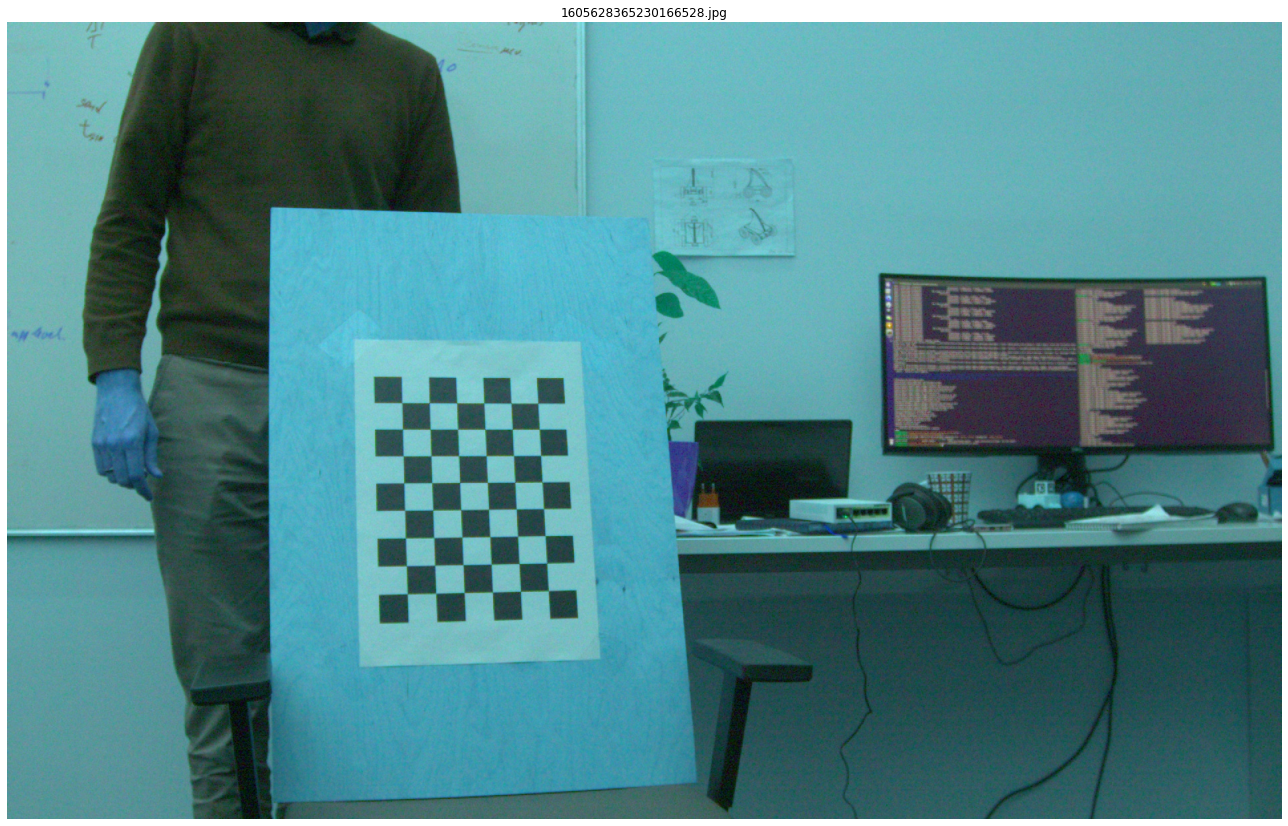

In [117]:
idx = 5

check_key = list(images.keys())[idx]

plot_figures({check_key: images[check_key]})

### Detect keypoints


In [118]:
pattern_size = (8, 6)
edge_length = 0.05

In [119]:
detections = detect_keypoints(images, pattern_size, edge_length)

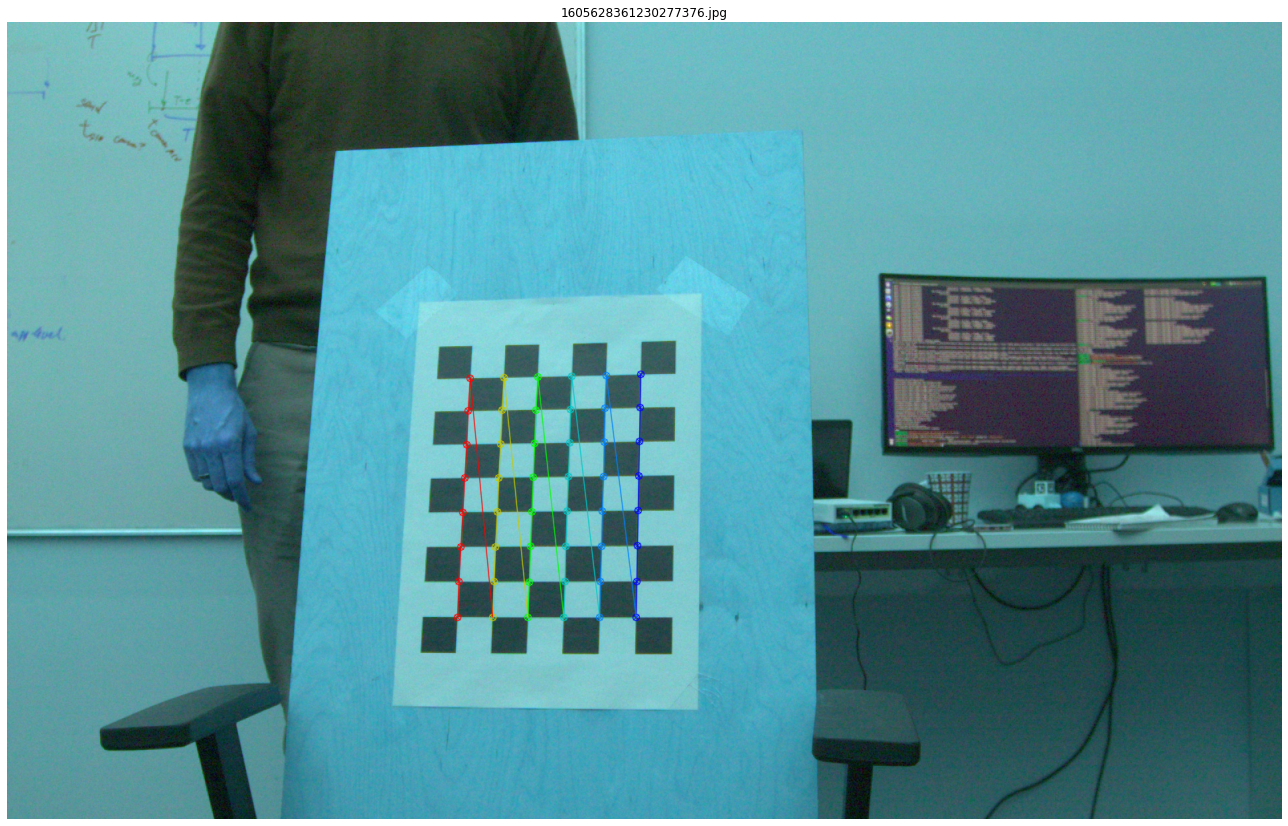

In [120]:
idx = 3

check_key = list(images.keys())[idx]

plot_figures({check_key: draw_chessboard_corners(images[check_key], detections[check_key][1], pattern_size)})

### Calibrate intrinsics

In [121]:
# Orientation of the detected pattern of different images may be different. Use one image as anchor and leave only 
# those that have the same orientation

f_detections = filter_orientation(detections, pattern_size, anchor_index=0)

In [122]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.0001)

scene_points, loc_kp, shape = prepare_calib_input(images, detections, detections.keys())

In [123]:

# Note: K3 dist. coeff. is set to zero, because ros requires 4 distortion parameters. Change if needed.
reproj_error, intrinsics, dist_coeff, _, _ = cv.calibrateCamera(scene_points, loc_kp, shape, None, None, flags=cv.CALIB_FIX_K3, criteria=criteria)

print(reproj_error)

0.216398315850369


### Visualize calibration results

In [124]:
undist_intrinsics = undistort_intrinsics(images, intrinsics, dist_coeff)

In [125]:
print("Intrinsics:")
print(intrinsics, end='\n\n')

print("Distortion coefficients:")
print(dist_coeff, end='\n\n')

print("Undistored intrinsics: ")
print(undist_intrinsics)

Intrinsics:
[[2.17734124e+03 0.00000000e+00 9.83324968e+02]
 [0.00000000e+00 2.17742975e+03 5.87643728e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion coefficients:
[[-0.20595769  0.15639324 -0.00094114  0.00141548  0.        ]]

Undistored intrinsics: 
[[2.07027588e+03 0.00000000e+00 9.86479679e+02]
 [0.00000000e+00 2.06618799e+03 5.85876151e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [126]:
undist_images = undistort_images(images, intrinsics, dist_coeff, undist_intrinsics)

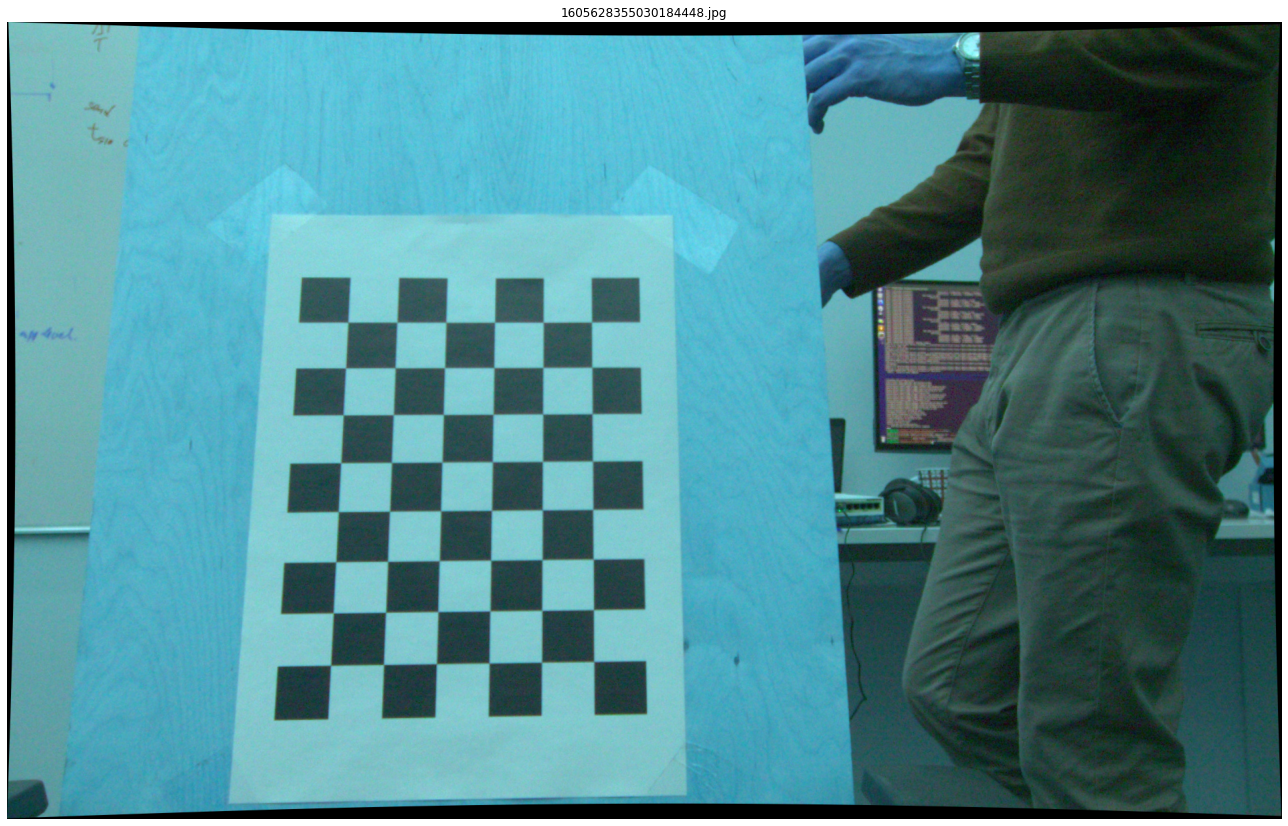

In [127]:
idx = 0

check_key = list(images.keys())[idx]

plot_figures({check_key: undist_images[check_key]})

In [128]:
calib_name = 'basler1'
save_intrinsics_calib(calib_name, intrinsics, dist_coeff, undist_intrinsics)

Saved calibration results as calib_output/basler1_intrinsics.npy
